In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

In [2]:
df = pd.read_csv("movie.csv")
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [3]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,40000.0,0.499525,0.500006,0.0,0.0,0.0,1.0,1.0


In [8]:
df.columns

Index(['text', 'label'], dtype='object')

In [9]:
df.isnull().any()

text     False
label    False
dtype: bool

<Axes: >

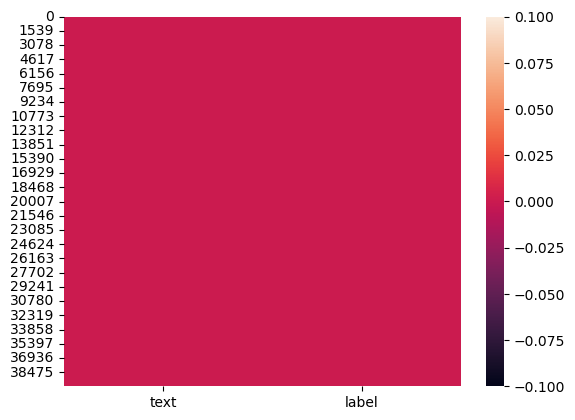

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.shape

(40000, 2)

In [12]:
df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

# Preprocessing

## Lowercasing

In [13]:
def to_lowercase(text):
    return text.lower()

df['lowercase_text'] = df['text'].apply(to_lowercase)
print(df)

                                                    text  label  \
0      I grew up (b. 1965) watching and loving the Th...      0   
1      When I put this movie in my DVD player, and sa...      0   
2      Why do people who do not know what a particula...      0   
3      Even though I have great interest in Biblical ...      0   
4      Im a die hard Dads Army fan and nothing will e...      1   
...                                                  ...    ...   
39995  "Western Union" is something of a forgotten cl...      1   
39996  This movie is an incredible piece of work. It ...      1   
39997  My wife and I watched this movie because we pl...      0   
39998  When I first watched Flatliners, I was amazed....      1   
39999  Why would this film be so good, but only gross...      1   

                                          lowercase_text  
0      i grew up (b. 1965) watching and loving the th...  
1      when i put this movie in my dvd player, and sa...  
2      why do peop

## Spelling Correction

In [14]:
pip install nltk textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob


## Punctuation and Number Removal

In [16]:
import re

def remove_punctuation_and_numbers(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['no_punctuation'] = df['lowercase_text'].apply(remove_punctuation_and_numbers)
print(df)

                                                    text  label  \
0      I grew up (b. 1965) watching and loving the Th...      0   
1      When I put this movie in my DVD player, and sa...      0   
2      Why do people who do not know what a particula...      0   
3      Even though I have great interest in Biblical ...      0   
4      Im a die hard Dads Army fan and nothing will e...      1   
...                                                  ...    ...   
39995  "Western Union" is something of a forgotten cl...      1   
39996  This movie is an incredible piece of work. It ...      1   
39997  My wife and I watched this movie because we pl...      0   
39998  When I first watched Flatliners, I was amazed....      1   
39999  Why would this film be so good, but only gross...      1   

                                          lowercase_text  \
0      i grew up (b. 1965) watching and loving the th...   
1      when i put this movie in my dvd player, and sa...   
2      why do p

## Tokenization

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sandesh
[nltk_data]     Chavare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

df['tokenized_text'] = df['no_punctuation'].apply(tokenize)
print(df)

                                                    text  label  \
0      I grew up (b. 1965) watching and loving the Th...      0   
1      When I put this movie in my DVD player, and sa...      0   
2      Why do people who do not know what a particula...      0   
3      Even though I have great interest in Biblical ...      0   
4      Im a die hard Dads Army fan and nothing will e...      1   
...                                                  ...    ...   
39995  "Western Union" is something of a forgotten cl...      1   
39996  This movie is an incredible piece of work. It ...      1   
39997  My wife and I watched this movie because we pl...      0   
39998  When I first watched Flatliners, I was amazed....      1   
39999  Why would this film be so good, but only gross...      1   

                                          lowercase_text  \
0      i grew up (b. 1965) watching and loving the th...   
1      when i put this movie in my dvd player, and sa...   
2      why do p

## Stopword Removal

In [19]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

df['no_stopwords']=df['tokenized_text'].apply(remove_stopwords)
print(df)

[nltk_data] Downloading package stopwords to C:\Users\Sandesh
[nltk_data]     Chavare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                    text  label  \
0      I grew up (b. 1965) watching and loving the Th...      0   
1      When I put this movie in my DVD player, and sa...      0   
2      Why do people who do not know what a particula...      0   
3      Even though I have great interest in Biblical ...      0   
4      Im a die hard Dads Army fan and nothing will e...      1   
...                                                  ...    ...   
39995  "Western Union" is something of a forgotten cl...      1   
39996  This movie is an incredible piece of work. It ...      1   
39997  My wife and I watched this movie because we pl...      0   
39998  When I first watched Flatliners, I was amazed....      1   
39999  Why would this film be so good, but only gross...      1   

                                          lowercase_text  \
0      i grew up (b. 1965) watching and loving the th...   
1      when i put this movie in my dvd player, and sa...   
2      why do p

# Stemming

In [20]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

df['stemmed_text']=df['no_stopwords'].apply(stem_words)
print(df)

                                                    text  label  \
0      I grew up (b. 1965) watching and loving the Th...      0   
1      When I put this movie in my DVD player, and sa...      0   
2      Why do people who do not know what a particula...      0   
3      Even though I have great interest in Biblical ...      0   
4      Im a die hard Dads Army fan and nothing will e...      1   
...                                                  ...    ...   
39995  "Western Union" is something of a forgotten cl...      1   
39996  This movie is an incredible piece of work. It ...      1   
39997  My wife and I watched this movie because we pl...      0   
39998  When I first watched Flatliners, I was amazed....      1   
39999  Why would this film be so good, but only gross...      1   

                                          lowercase_text  \
0      i grew up (b. 1965) watching and loving the th...   
1      when i put this movie in my dvd player, and sa...   
2      why do p

In [21]:
df

,text,label,lowercase_text,no_punctuation,tokenized_text,no_stopwords,stemmed_text
0,I grew up (b. 1965) watching and loving the Th...,0,i grew up (b. 1965) watching and loving the th...,i grew up b watching and loving the thunderbi...,"[i, grew, up, b, watching, and, loving, the, t...","[grew, b, watching, loving, thunderbirds, mate...","[grew, b, watch, love, thunderbird, mate, scho..."
1,"When I put this movie in my DVD player, and sa...",0,"when i put this movie in my dvd player, and sa...",when i put this movie in my dvd player and sat...,"[when, i, put, this, movie, in, my, dvd, playe...","[put, movie, dvd, player, sat, coke, chips, ex...","[put, movi, dvd, player, sat, coke, chip, expe..."
2,Why do people who do not know what a particula...,0,why do people who do not know what a particula...,why do people who do not know what a particula...,"[why, do, people, who, do, not, know, what, a,...","[people, know, particular, time, past, like, f...","[peopl, know, particular, time, past, like, fe..."
3,Even though I have great interest in Biblical ...,0,even though i have great interest in biblical ...,even though i have great interest in biblical ...,"[even, though, i, have, great, interest, in, b...","[even, though, great, interest, biblical, movi...","[even, though, great, interest, biblic, movi, ..."
4,Im a die hard Dads Army fan and nothing will e...,1,im a die hard dads army fan and nothing will e...,im a die hard dads army fan and nothing will e...,"[im, a, die, hard, dads, army, fan, and, nothi...","[im, die, hard, dads, army, fan, nothing, ever...","[im, die, hard, dad, armi, fan, noth, ever, ch..."
...,...,...,...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,"""western union"" is something of a forgotten cl...",western union is something of a forgotten clas...,"[western, union, is, something, of, a, forgott...","[western, union, something, forgotten, classic...","[western, union, someth, forgotten, classic, w..."
39996,This movie is an incredible piece of work. It ...,1,this movie is an incredible piece of work. it ...,this movie is an incredible piece of work it e...,"[this, movie, is, an, incredible, piece, of, w...","[movie, incredible, piece, work, explores, eve...","[movi, incred, piec, work, explor, everi, nook..."
39997,My wife and I watched this movie because we pl...,0,my wife and i watched this movie because we pl...,my wife and i watched this movie because we pl...,"[my, wife, and, i, watched, this, movie, becau...","[wife, watched, movie, plan, visit, sicily, st...","[wife, watch, movi, plan, visit, sicili, strom..."
39998,"When I first watched Flatliners, I was amazed....",1,"when i first watched flatliners, i was amazed....",when i first watched flatliners i was amazed i...,"[when, i, first, watched, flatliners, i, was, ...","[first, watched, flatliners, amazed, necessary...","[first, watch, flatlin, amaz, necessari, featu..."


# Training and Testing

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['text'] ).toarray()
y = df['label']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

# Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      3966
           1       0.88      0.89      0.89      4034

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000

Accuracy: 0.887
Precision: 0.8833904948554631
Recall: 0.8939018344075359


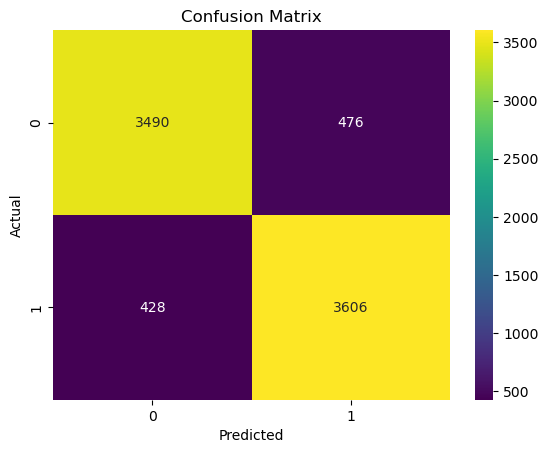

In [28]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# Testing on Random Sample

In [37]:
test_sentence = "This movie is an incredible piece of work. Spend some real time with this one."

predict_input = cv.transform([test_sentence]).toarray()
predicted_label = model.predict(predict_input)

In [38]:
print(f"Test Sentence: \"{test_sentence}\"")
print(f"Predicted Sentiment: {'Positive' if predicted_label[0] == 1 else 'Negative'}")

Test Sentence: "This movie is an incredible piece of work. Spend some real time with this one."
Predicted Sentiment: Positive
